In [103]:
import pandas as pd
import numpy as np

In [104]:
# Basics of Pandas
# 1-D Data in Pandas is represented as a Series
step_data = [1234, 6785, 234, 12]
step_counts = pd.Series(step_data, name='steps')

In [105]:
print(step_counts)

0    1234
1    6785
2     234
3      12
Name: steps, dtype: int64


In [106]:
# Tag the data with dates and set periodicity of the series, psst! Now it's become a Time-Series data!
step_counts.index = pd.date_range('20190119',periods=4)

In [107]:
print(step_counts)

2019-01-19    1234
2019-01-20    6785
2019-01-21     234
2019-01-22      12
Freq: D, Name: steps, dtype: int64


In [108]:
# You can access particular data points using the date just like you would in a dictionary
print(step_counts['20190122'])

# You can also do it like an array!
print(step_counts[2])

# Or of 2019!
print(step_counts['2019'])

12
234
2019-01-19    1234
2019-01-20    6785
2019-01-21     234
2019-01-22      12
Freq: D, Name: steps, dtype: int64


In [109]:
# You can check the data type like so
print(step_counts.dtype)

int64


In [110]:
# You can change the dtype like so
step_counts = step_counts.astype(float)

In [111]:
print(step_counts.dtype)

float64


In [112]:
# Assigning NaN values to series
step_counts[1:10] = np.NaN
print(step_counts)

2019-01-19    1234.0
2019-01-20       NaN
2019-01-21       NaN
2019-01-22       NaN
Freq: D, Name: steps, dtype: float64


In [113]:
# Assigning 0 to series
step_counts = step_counts.fillna(0)
print(step_counts)

2019-01-19    1234.0
2019-01-20       0.0
2019-01-21       0.0
2019-01-22       0.0
Freq: D, Name: steps, dtype: float64


In [114]:
# Creating a dataframe using lists, tuples and series in a pandas env.
cycling_data = [10, 3, None]
joined_data = list(zip(cycling_data, step_data))
activity_df = pd.DataFrame(joined_data, index = pd.date_range('20190120', periods = 3), columns=['Cycling', 'Running'])
print(activity_df)

            Cycling  Running
2019-01-20     10.0     1234
2019-01-21      3.0     6785
2019-01-22      NaN      234


In [115]:
# Locate a row in DF by passing index
activity_df.loc['2019']

,Cycling,Running
2019-01-20,10.0,1234
2019-01-21,3.0,6785
2019-01-22,NaN,234


In [39]:
# Locate a row in DF by passing index values
activity_df.iloc[-1]

Cycling      NaN
Running    234.0
Name: 2019-01-22 00:00:00, dtype: float64

In [46]:
# Get a column
activity_df['Cycling']
# or OOPS approach
print(activity_df.Cycling)
# or 2nd column
activity_df.iloc[:,1]

2019-01-20    10.0
2019-01-21     3.0
2019-01-22     NaN
Freq: D, Name: Cycling, dtype: float64


2019-01-20    1234
2019-01-21    6785
2019-01-22     234
Freq: D, Name: Running, dtype: int64

In [47]:
# Reading the iris dataset
fp = "data/Iris_Data.csv"
iris_df = pd.read_csv(fp)

In [48]:
# Displaying 5 records
iris_df.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
iris_df['sepal_area'] = iris_df['sepal_length'] * iris_df['sepal_width']
iris_df.iloc[:5,:]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00


In [56]:
iris_df['abbrev'] = (iris_df.species.apply(lambda x: x.replace("Iris-","")))
iris_df.iloc[:5,-2:]

,sepal_area,abbrev
0,17.85,setosa
1,14.70,setosa
2,15.04,setosa
3,14.26,setosa
4,18.00,setosa


In [60]:
# Concatenate first 2 and last 2 rows
small_df = pd.concat([iris_df.iloc[:2], iris_df.iloc[-2:]])
small_df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,abbrev
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,setosa
148,6.2,3.4,5.4,2.3,Iris-virginica,21.08,virginica
149,5.9,3.0,5.1,1.8,Iris-virginica,17.70,virginica


In [61]:
# Grouping
step_counts.value_counts()

0.0       3
1234.0    1
Name: steps, dtype: int64

In [66]:
group_sizes = (iris_df.groupby('abbrev').size())
print(group_sizes)

abbrev
setosa        50
versicolor    50
virginica     50
dtype: int64


In [70]:
# Mean of the df
print(iris_df.mean())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64


In [72]:
print("Std. Dev.")
print(iris_df.std())

Std. Dev.
sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
sepal_area      3.368693
dtype: float64


In [73]:
print("Var.")
print(iris_df.var())

Var.
sepal_length     0.685694
sepal_width      0.188004
petal_length     3.113179
petal_width      0.582414
sepal_area      11.348090
dtype: float64


In [75]:
print("SEM")
print(iris_df.sem())

SEM
sepal_length    0.067611
sepal_width     0.035403
petal_length    0.144064
petal_width     0.062312
sepal_area      0.275053
dtype: float64


In [76]:
# Describe all of this
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,17.806533
std,0.828066,0.433594,1.764420,0.763161,3.368693
min,4.300000,2.000000,1.000000,0.100000,10.000000
25%,5.100000,2.800000,1.600000,0.300000,15.645000
50%,5.800000,3.000000,4.350000,1.300000,17.660000
75%,6.400000,3.300000,5.100000,1.800000,20.325000
max,7.900000,4.400000,6.900000,2.500000,30.020000


In [88]:
# Sample 5 rows without replacement
sample = (iris_df.sample(n=5, replace=False, random_state=77))
print(sample.iloc[:,-3:])

             species  sepal_area      abbrev
82   Iris-versicolor       15.66  versicolor
133   Iris-virginica       17.64   virginica
113   Iris-virginica       14.25   virginica
93   Iris-versicolor       11.50  versicolor
5        Iris-setosa       21.06      setosa


In [94]:
# Visualisation

# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

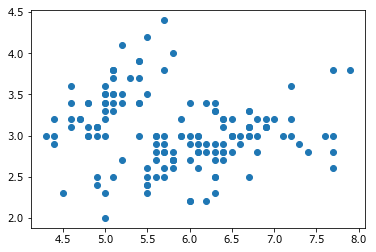

In [99]:
plt.plot(iris_df.sepal_length, iris_df.sepal_width, ls='', marker='o', label='sepal')

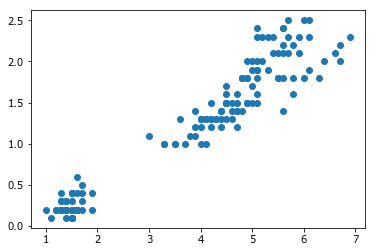

In [98]:
plt.plot(iris_df.petal_length, iris_df.petal_width, ls='', marker='o',label='petal')

(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <a list of 25 Patch objects>)

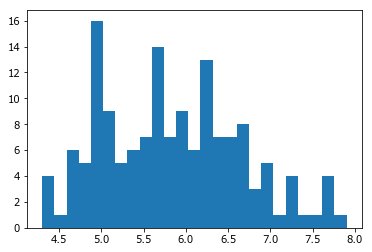

In [102]:
plt.hist(iris_df.sepal_length, bins=25)

[Text(0,0.5,'Items'), Text(0.5,0,'Sepal Width'), Text(0.5,1,'Sepal Width')]

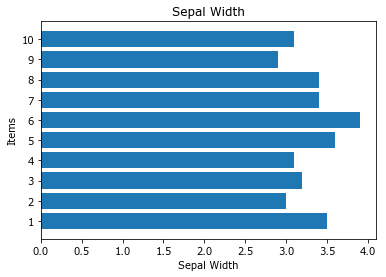

In [141]:
fig, ax = plt.subplots()
ax.barh(np.arange(10),iris_df.sepal_width.iloc[:10])

# Setting the ticks - Data scale markers for x and y axis
ax.set_yticks(np.arange(0.0,10,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel="Sepal Width", ylabel="Items", title="Sepal Width")

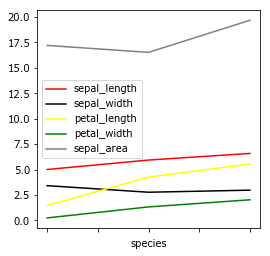

In [129]:
# Group by functions in matplotlib
(iris_df.groupby('species').mean().plot(color=['red','black','yellow','green','gray'], fontsize = 10, figsize = (4,4)))

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


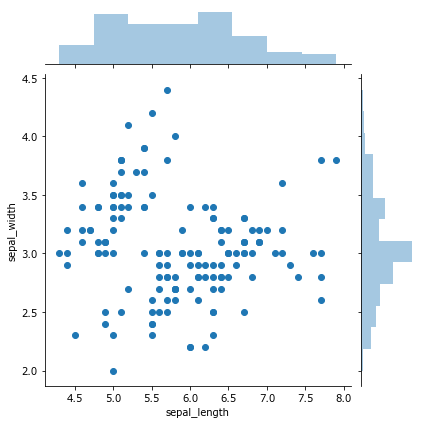

In [133]:
# Using Seaborn's joint plot
import seaborn as sns
sns.jointplot(x='sepal_length', y='sepal_width', data=iris_df, size=6)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


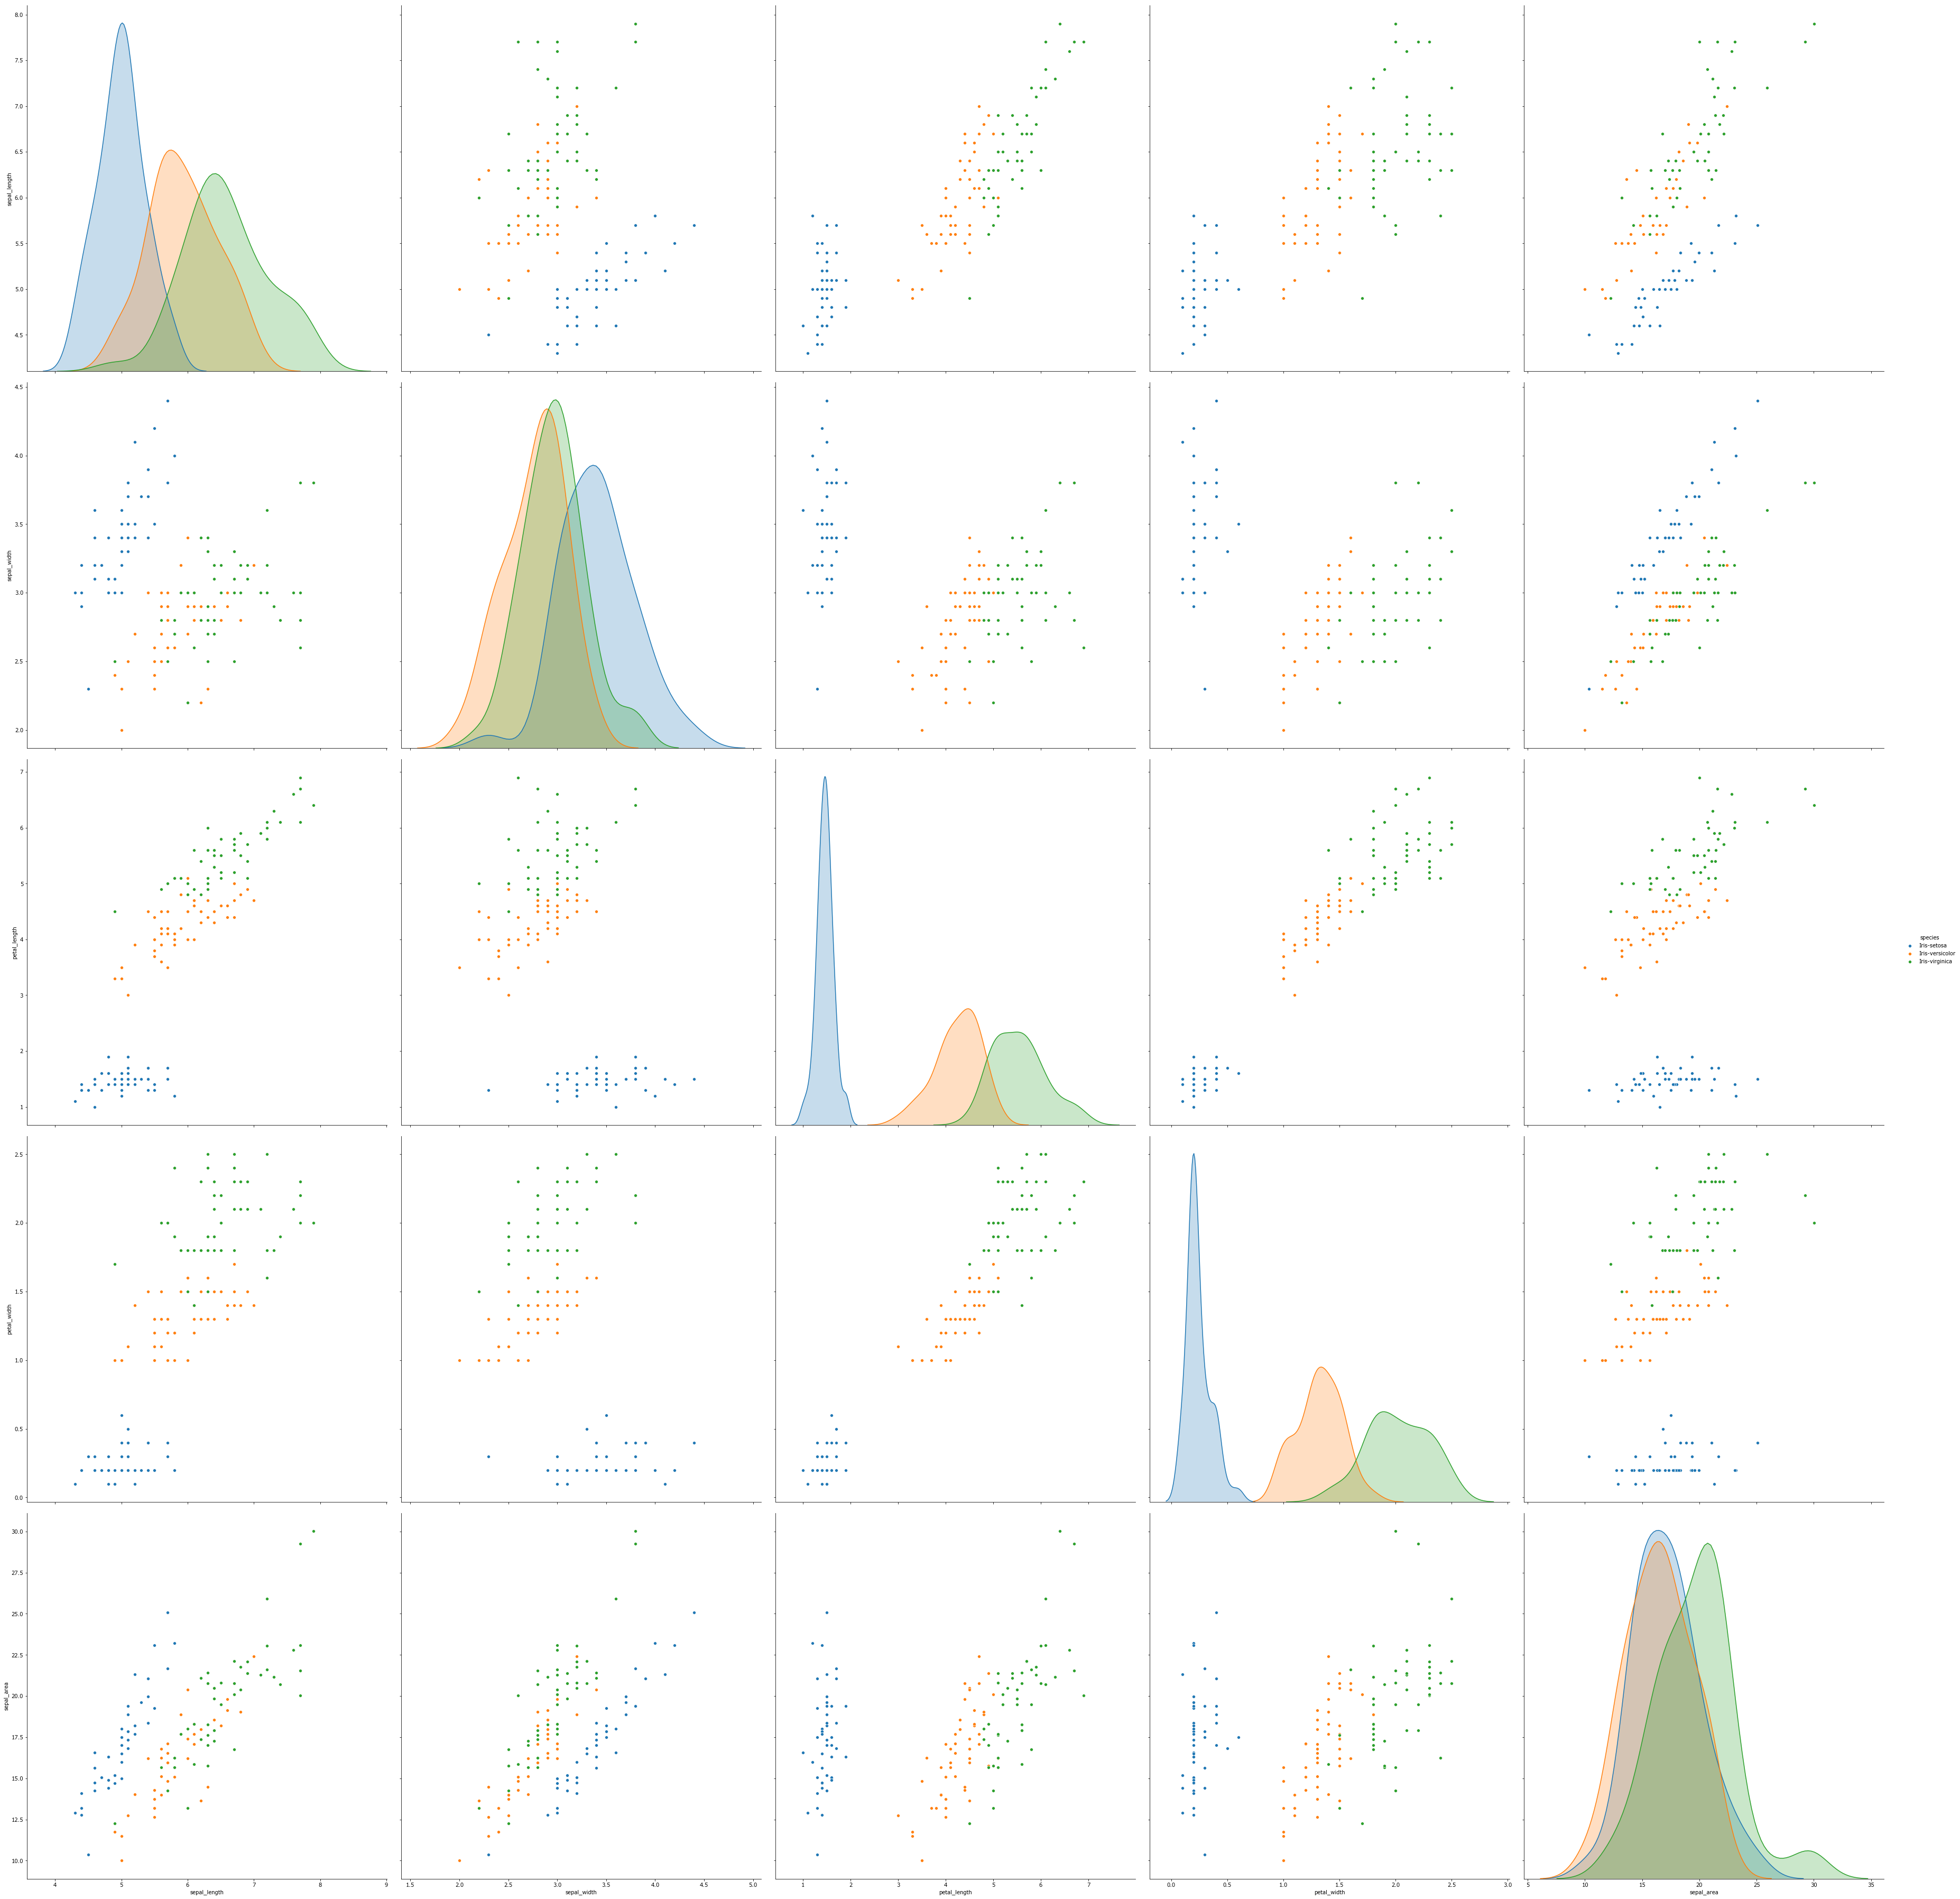

In [135]:
sns.pairplot(iris_df, hue='species', size=10)